In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
from matplotlib import pyplot as plt
import folium
import plotly_express as px
import descartes
import rtree

In [2]:
countries = gpd.read_file('./countries.gpkg')

cities = gpd.read_file('./cities.geojson')

In [3]:
dataframe = countries[['NAME', 'POP_EST']]

print(dataframe.head(8))
print(type(dataframe))

        NAME    POP_EST
0  Indonesia  260580739
1   Malaysia   31381992
2      Chile   17789267
3    Bolivia   11138234
4       Peru   31036656
5  Argentina   44293293
6   Dhekelia       7850
7     Cyprus    1221549
<class 'pandas.core.frame.DataFrame'>


In [4]:
geodataframe = countries[['geometry', 'NAME']]
geodataframe.head(8)

print(countries.head())

        NAME    POP_EST  POP_RANK  GDP_MD_EST  POP_YEAR  LASTCENSUS  GDP_YEAR  \
0  Indonesia  260580739        17   3028000.0      2017        2010      2016   
1   Malaysia   31381992        15    863000.0      2017        2010      2016   
2      Chile   17789267        14    436100.0      2017        2002      2016   
3    Bolivia   11138234        14     78350.0      2017        2001      2016   
4       Peru   31036656        15    410400.0      2017        2007      2016   

                    ECONOMY              INCOME_GRP      CONTINENT  \
0  4. Emerging region: MIKT  4. Lower middle income           Asia   
1      6. Developing region  3. Upper middle income           Asia   
2   5. Emerging region: G20  3. Upper middle income  South America   
3   5. Emerging region: G20  4. Lower middle income  South America   
4   5. Emerging region: G20  3. Upper middle income  South America   

                                            geometry  
0  MULTIPOLYGON (((117.70361 4.16341,

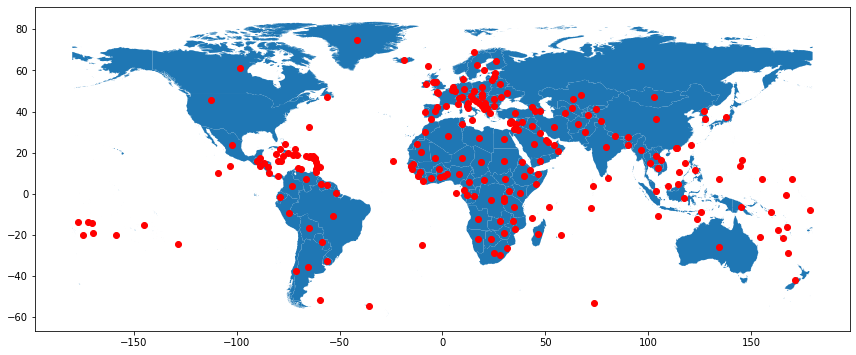

In [5]:
fig, ax = plt.subplots(figsize=(12, 12))
countries.plot(ax=ax)
geodataframe.centroid.plot(color='red', ax=ax)
plt.tight_layout()
plt.show()

In [6]:
country_shapes = countries[['geometry', 'NAME']]

country_names = countries[['NAME', 'POP_EST']]

country_merged = country_shapes.merge(country_names, on='NAME', how='left')

In [7]:
country_frame = countries[['geometry', 'NAME']]

city_frame = cities[['geometry', 'name']]

cities_with_country = gpd.sjoin(city_frame,
                                country_frame,
                                how='inner',
                                op='within')

cities_with_country.sample(5)

,geometry,name,index_right,NAME
915,POINT (32.60002 41.20000),Karabük,66,Turkey
4241,POINT (-51.13999 -29.70962),Novo Hamburgo,45,Brazil
6467,POINT (-97.50000 25.87998),Matamoros,155,Mexico
811,POINT (-132.80064 55.21398),Hydaburg,153,United States of America
3046,POINT (123.50702 7.85297),Pagadian,178,Philippines


In [8]:
cities_with_country.sample(50)

,geometry,name,index_right,NAME
590,POINT (-93.36870 43.64779),Albert Lea,153,United States of America
5617,POINT (137.77003 -32.49002),Port Augusta,172,Australia
3557,POINT (-80.90580 22.71958),Colón,134,Cuba
233,POINT (7.15000 46.80000),Fribourg,92,Switzerland
3953,POINT (-70.05000 -26.36962),Diego de Almagro,2,Chile
1465,POINT (-55.72997 -22.53001),Ponta Porã,45,Brazil
328,POINT (-70.41670 19.38300),Salcedo,113,Dominican Rep.
1304,POINT (121.99595 39.62591),Wafangdian,9,China
3678,POINT (110.81364 32.80816),Yunxian,9,China
2359,POINT (29.79998 -18.92961),Kwekwe,108,Zimbabwe


In [30]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
capitals = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

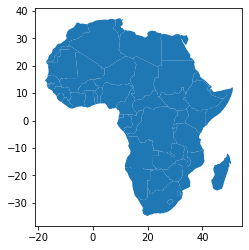

In [10]:
africa = world[world['continent'] == 'Africa']
africa = africa[['geometry', 'name']]

africa.plot()

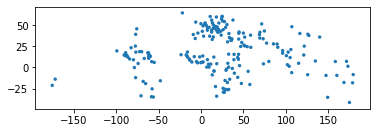

In [31]:
capitals_working = capitals
capitals_working['geometry'] = capitals.buffer(2)
capitals_working.plot()

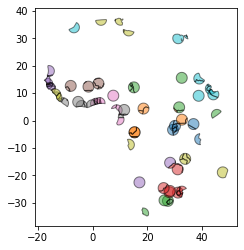

In [32]:
africa_cores = gpd.overlay(africa, capitals_working, how='intersection')
africa_cores.plot(alpha=0.5, edgecolor='k', cmap='tab10')

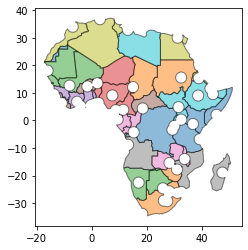

In [33]:
africa_peripheries = gpd.overlay(africa, capitals_working, how='difference')
africa_peripheries.plot(alpha=0.5, edgecolor='k', cmap='tab10')

